## ReAct Prompting

ReAct, LLM'lerin hem muhakeme izlerini hem de göreve özgü eylemleri iç içe geçmiş bir şekilde üretmek için kullanıldığı bir çerçevedir. Muhakeme izlerinin üretilmesi, modelin eylem planlarını başlatmasını, izlemesini ve güncellemesini ve hatta istisnaları ele almasını sağlar. Eylem adımı, bilgi tabanları veya ortamlar gibi harici kaynaklarla arayüz oluşturmayı ve bilgi toplamayı sağlar. ReAct, LLM'lerin daha güvenilir ve gerçekçi yanıtlar sağlayan ek bilgileri almak için harici araçlarla etkileşime girmesini sağlar.

Yani ReAct, LLM'in hem mantıksal düşünmesini hem de araçları çağırarak aktif görev yapmasını sağlar. Bu yaklaşım, özellikle tool-augmented agents (araçlarla güçlendirilmiş ajanlar) için idealdir.

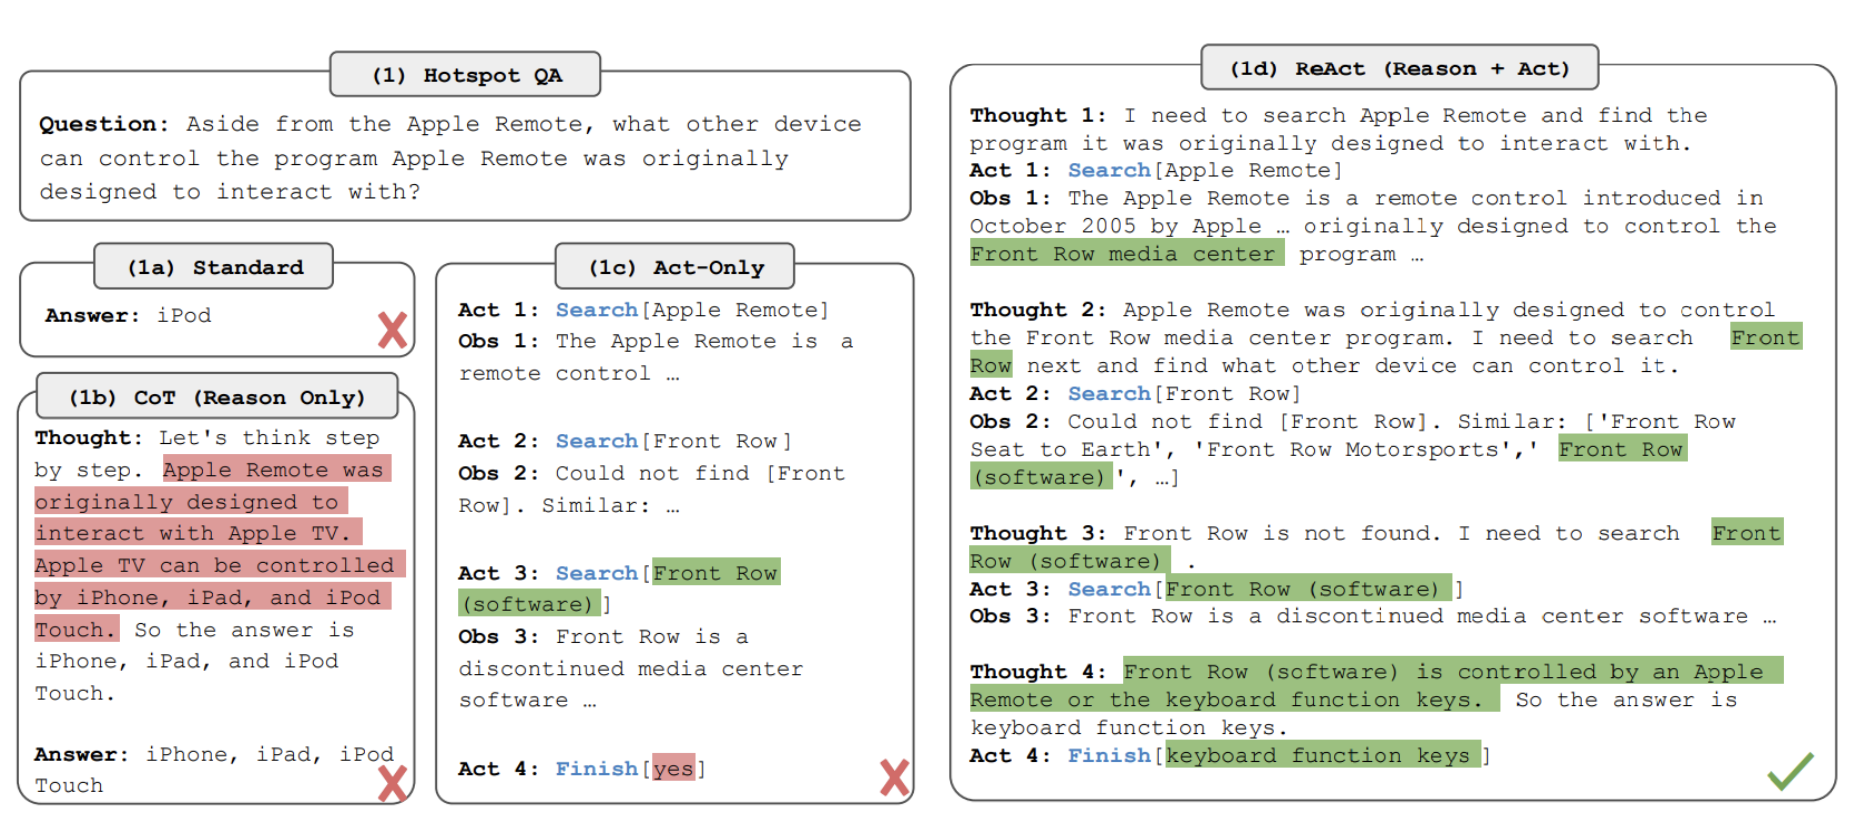

In [1]:
%%capture
# gerekli kütüphaneleri yükle ya da güncelle
!pip install numexpr
!pip install --upgrade openai
!pip install --upgrade langchain
!pip install --upgrade python-dotenv
!pip install google-search-results

# import libraries
import openai
import os
from langchain.chat_models import ChatOpenAI
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from dotenv import load_dotenv
load_dotenv()

# API keyleri yükler: eğer sahip değilseniz elde etmeniz gerekmektedir.
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")

In [2]:
llm = ChatOpenAI(model_name="gpt-3.5-turbo" ,temperature=0)
tools = load_tools(["google-serper", "llm-math"], llm=llm)
agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)

/var/folders/95/m9qjyz8151v57818xl_9y21c0000gn/T/ipykernel_68217/1810763761.py:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model_name="gpt-3.5-turbo" ,temperature=0)
/var/folders/95/m9qjyz8151v57818xl_9y21c0000gn/T/ipykernel_68217/1810763761.py:3: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as g

In [3]:
# run the agent,
agent.run("Who is Olivia Wilde's boyfriend? What is his current age raised to the 0.23 power?")

/var/folders/95/m9qjyz8151v57818xl_9y21c0000gn/T/ipykernel_68217/2652125755.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  agent.run("Who is Olivia Wilde's boyfriend? What is his current age raised to the 0.23 power?")




> Entering new AgentExecutor chain...
I need to find out who Olivia Wilde's boyfriend is and then calculate his current age raised to the 0.23 power.
Action: google_serper
Action Input: Olivia Wilde boyfriend
Observation: As of early 2025, Wilde has been dating actor Dane DiLiegro.
Thought:Now I need to find Dane DiLiegro's current age.
Action: google_serper
Action Input: Dane DiLiegro age
Observation: Dane DiLiegro: American actor. Dane Robert DiLiegro is an American actor and former basketball player. DiLiegro played professional basketball for eight seasons for teams in Italy and Israel. Dane DiLiegro Born: 1988 (age 36 years), Lexington, MA. Dane DiLiegro Height: 6′ 8″. Born. Dane Robert DiLiegro. (1988-08-06) August 6, 1988 (age 36). Lexington, Massachusetts, U.S. ; Citizenship. United States; Italy; Israel ; Occupation(s) ... Associated With. He acted alongside Andrew Lincoln and Melissa McBride in The Walking Dead. Popularity. Most Popular #7,459 Born on August 6 #18 · First N

"Dane DiLiegro's current age raised to the 0.23 power is approximately 2.28"